In [1]:
import numpy as np
import torch
from transformers import BertModel, BertTokenizer
import matplotlib.pyplot as plt

torch.cuda.is_available()

True

In [2]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

In [3]:
text = "I love her much"
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

In [4]:
outputs = model(**inputs)

In [5]:
attention_scores = outputs.attentions[0][0]  # (layer, batch, :heads:)

In [6]:
mean_attention_scores = torch.mean(attention_scores[:, 1:-1, 1:-1], dim=0).detach().numpy()

In [7]:
words = tokenizer.tokenize(text)

In [8]:
text2 = "I love her smile"

inputs = tokenizer(text2, return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)
attention_scores = outputs.attentions[0][0]
mean_attention_scores_1 = torch.mean(attention_scores[:, 1:-1, 1:-1], dim=0).detach().numpy()
words2 = tokenizer.tokenize(text2)

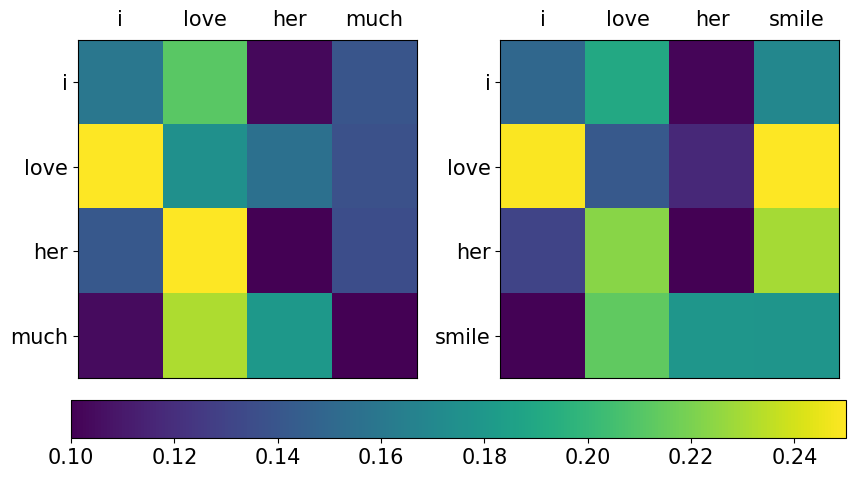

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5.5))
vmin, vmax = 0.1, 0.25

im1 = axs[0].matshow(mean_attention_scores, cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_xticks(range(len(words2)))
axs[0].set_yticks(range(len(words2)))
axs[0].set_xticklabels(words, fontsize=15)
axs[0].set_yticklabels(words, fontsize=15)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False)

im2 = axs[1].matshow(mean_attention_scores_1, cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_xticks(range(len(words2)))
axs[1].set_yticks(range(len(words2)))
axs[1].set_xticklabels(words2, fontsize=15)
axs[1].set_yticklabels(words2, fontsize=15)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False)

cbar = fig.colorbar(im2, ax=axs, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=15)

axs[0].grid(False)
axs[1].grid(False)
plt.show()
fig.savefig('attention_scores.pdf')